In [372]:
import pandas as pd

In [374]:
df = pd.read_csv("Assessor_Parcel_Sales.csv")

In [375]:
print("Dataset preview:")
print(df.head())

Dataset preview:
            pin  year  township_code  neighborhood_code class  \
0  3.101210e+13  2000             32              32050   278   
1  1.429100e+13  2000             73              73150   299   
2  1.316410e+13  2000             71              71101   203   
3  2.423300e+13  2014             39              39250   100   
4  1.935400e+13  2016             72              72200   205   

          sale_date  is_mydec_date  sale_price  sale_document_num  \
0     April 01 2000          False      177500             317676   
1  February 01 2000          False      315000             326770   
2      June 01 2000          False      192000             519440   
3      June 01 2014          False         500         1427529079   
4    August 01 2016          False           1         1625129009   

  sale_deed_type mydec_deed_type sale_seller_name  is_multisale  \
0        Trustee             NaN              NaN         False   
1       Warranty             NaN           

In [376]:
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset has 1048575 rows and 20 columns.


In [377]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
pin                                       0
year                                      0
township_code                             0
neighborhood_code                         0
class                                     0
sale_date                                 0
is_mydec_date                             0
sale_price                                0
sale_document_num                         0
sale_deed_type                           47
mydec_deed_type                     1048369
sale_seller_name                     101492
is_multisale                              0
num_parcels_sale                          0
sale_buyer_name                      101176
sale_type                              2776
sale_filter_same_sale_within_365          0
sale_filter_less_than_10k                 0
sale_filter_deed_type                     0
row_id                                    0
dtype: int64


In [382]:
print("\nPercentage of missing values per column:")
print((df.isnull().mean() * 100).round(2))


Percentage of missing values per column:
pin                                  0.00
year                                 0.00
township_code                        0.00
neighborhood_code                    0.00
class                                0.00
sale_date                            0.00
is_mydec_date                        0.00
sale_price                           0.00
sale_document_num                    0.00
sale_deed_type                       0.00
mydec_deed_type                     99.98
sale_seller_name                     9.68
is_multisale                         0.00
num_parcels_sale                     0.00
sale_buyer_name                      9.65
sale_type                            0.26
sale_filter_same_sale_within_365     0.00
sale_filter_less_than_10k            0.00
sale_filter_deed_type                0.00
row_id                               0.00
dtype: float64


In [384]:
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['pin', 'year', 'township_code', 'neighborhood_code', 'class', 'sale_date', 'is_mydec_date', 'sale_price', 'sale_document_num', 'sale_deed_type', 'mydec_deed_type', 'sale_seller_name', 'is_multisale', 'num_parcels_sale', 'sale_buyer_name', 'sale_type', 'sale_filter_same_sale_within_365', 'sale_filter_less_than_10k', 'sale_filter_deed_type', 'row_id']


In [386]:
top5_townships = (
    df.groupby("township_code")["sale_price"]
      .median()
      .sort_values(ascending=False)
      .head(5)
)

In [388]:
print(top5_townships)

township_code
23    675000.0
10    532000.0
25    435000.0
33    375500.0
74    360000.0
Name: sale_price, dtype: float64


In [390]:
lowest5_townships = (
    df.groupby("township_code")["sale_price"]
      .median()
      .sort_values(ascending=True)
      .head(5)
)

In [392]:
print(lowest5_townships)

township_code
37    107500.0
14    115000.0
12    120000.0
13    140000.0
70    140000.0
Name: sale_price, dtype: float64


In [394]:
top10_sales = df.nlargest(10, 'sale_price')

In [396]:
top10_years = top10_sales['year']

In [398]:
print(top10_years.tolist())

[2007, 2007, 2004, 2007, 2007, 2002, 2006, 2006, 2006, 2006]


In [400]:
min_year = df['year'].min()

In [402]:
max_year = df['year'].max()

In [404]:
print(f" {min_year} to {max_year}.")

 1971 to 2024.


In [423]:
unique_codes = df['township_code'].nunique()

In [425]:
print(f"{unique_codes}")

38


In [427]:
# Redone using only 2024 data

In [429]:
df_2024 = df[df['year'] == 2024]

In [431]:
print(f"Number of records in 2024: {df_2024.shape[0]}")
print(df_2024.head())

Number of records in 2024: 193
               pin  year  township_code  neighborhood_code class  \
2378  1.709410e+13  2024             74              74030   299   
5542  1.704200e+13  2024             74              74011   315   
6005  1.515420e+13  2024             31              31034   517   
6279  1.321300e+13  2024             71              71171   590   
6987  3.126300e+13  2024             32              32045    EX   

              sale_date  is_mydec_date  sale_price  sale_document_num  \
2378    January 18 2024           True      530000         2402413376   
5542    October 10 2024           True     8300000         2430324045   
6005  September 18 2024           True      300000         2427128233   
6279      March 26 2024           True     2400000         2409409015   
6987   November 12 2024           True      151888         2433824102   

     sale_deed_type  ... sale_seller_name is_multisale  num_parcels_sale  \
2378       Warranty  ...              NaN    

In [433]:
top5_2024 = df_2024.groupby('township_code')['sale_price'].median().sort_values(ascending=False).head(5)

In [435]:
print(top5_2024)

township_code
75    3022500.0
23    2725000.0
19    1495000.0
20    1190500.0
10    1175000.0
Name: sale_price, dtype: float64


In [437]:
bottom5_2024 = df_2024.groupby('township_code')['sale_price'].median().sort_values(ascending=True).head(5)

In [439]:
print(bottom5_2024)

township_code
12      5000.0
39    170450.0
13    187000.0
32    200000.0
16    202500.5
Name: sale_price, dtype: float64


In [441]:
df_2024 = df[df['year'] == 2024]
unique_codes_2024 = df_2024['township_code'].nunique()

In [443]:
print(f"{unique_codes_2024}")

31


In [445]:
top10_sales_2024 = df_2024.nlargest(10, 'sale_price')[['township_code', 'sale_price', 'year']]

In [447]:
print(top10_sales_2024)

        township_code  sale_price  year
225902             74    85200000  2024
225871             74    30400000  2024
47751              74    20960500  2024
75548              77    10500000  2024
189332             70     8500000  2024
5542               74     8300000  2024
82159              77     7140000  2024
14108              70     6500000  2024
225879             70     6500000  2024
225893             70     6500000  2024


In [449]:
import matplotlib.pyplot as plt
import seaborn as sns

In [451]:
median_prices = df_2024.groupby('township_code')['sale_price'].median().sort_values(ascending=False).head(5)

C:\Users\rober\AppData\Local\Temp\ipykernel_45412\29571173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_prices.index.astype(str), y=median_prices.values, palette="viridis")


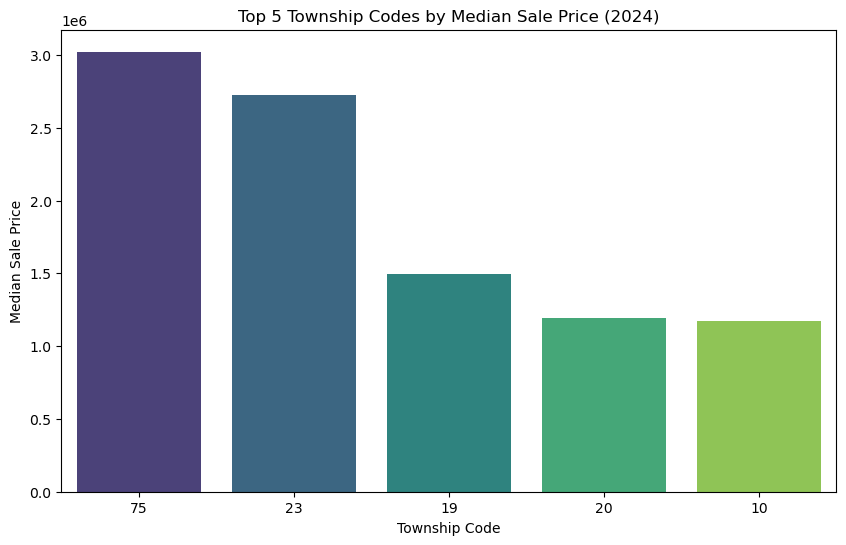

In [453]:
plt.figure(figsize=(10,6))
sns.barplot(x=median_prices.index.astype(str), y=median_prices.values, palette="viridis")
plt.title("Top 5 Township Codes by Median Sale Price (2024)")
plt.xlabel("Township Code")
plt.ylabel("Median Sale Price")
plt.show()

In [455]:
lowest5_median = df_2024.groupby('township_code')['sale_price'].median().sort_values(ascending=True).head(5)

C:\Users\rober\AppData\Local\Temp\ipykernel_45412\2618758188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest5_median.index.astype(str), y=lowest5_median.values, palette="magma")


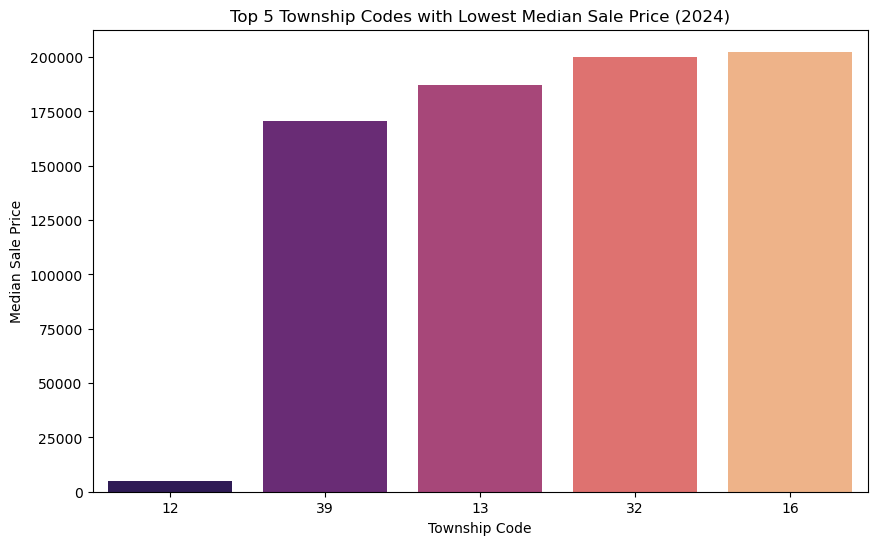

In [459]:
plt.figure(figsize=(10,6))
sns.barplot(x=lowest5_median.index.astype(str), y=lowest5_median.values, palette="magma")
plt.title("Top 5 Township Codes with Lowest Median Sale Price (2024)")
plt.xlabel("Township Code")
plt.ylabel("Median Sale Price")
plt.show()

In [483]:
top10_sales = df_2024.nlargest(10, 'sale_price')['sale_price']

C:\Users\rober\AppData\Local\Temp\ipykernel_45412\3487369713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 11)), y=top10_sales.tolist(), palette="viridis")


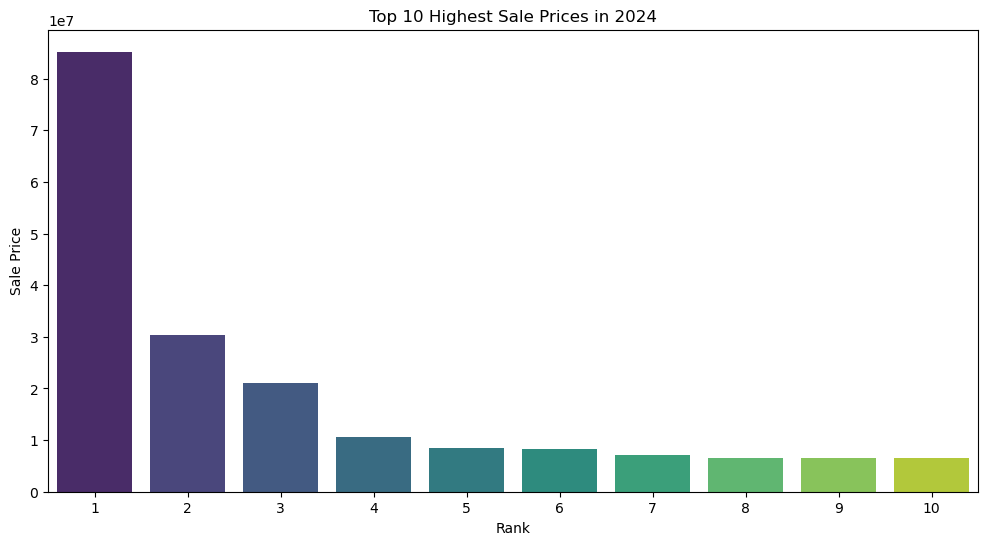

In [485]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(range(1, 11)), y=top10_sales.tolist(), palette="viridis")
plt.title("Top 10 Highest Sale Prices in 2024")
plt.xlabel("Rank")
plt.ylabel("Sale Price")
plt.xticks(range(0, 10), range(1, 11))  # Ranks 1 to 10
plt.show()

In [489]:
lowest10_sales = df_2024.nsmallest(10, 'sale_price')['sale_price']

C:\Users\rober\AppData\Local\Temp\ipykernel_45412\1079163001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 11)), y=lowest10_sales.tolist(), palette="magma")


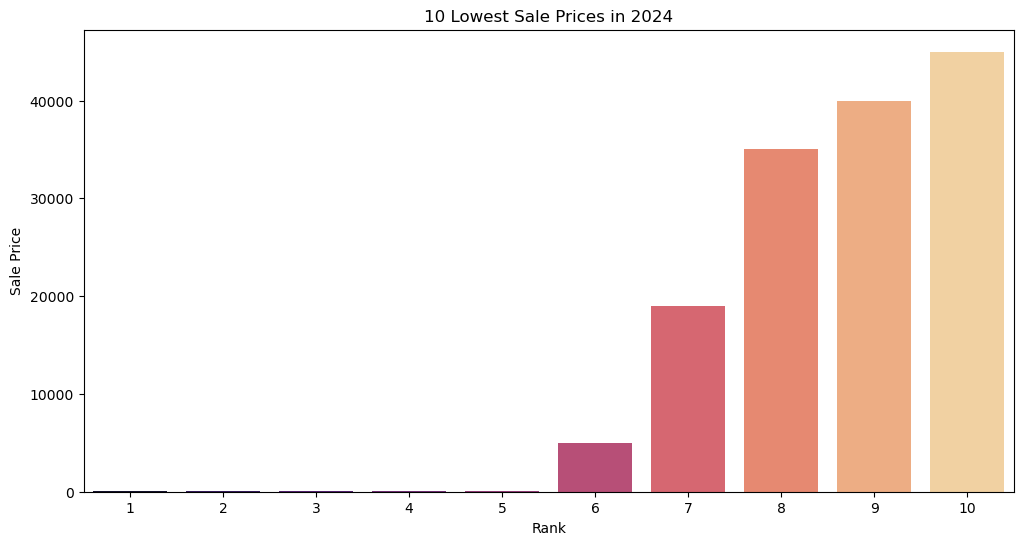

In [491]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(range(1, 11)), y=lowest10_sales.tolist(), palette="magma")
plt.title("10 Lowest Sale Prices in 2024")
plt.xlabel("Rank")
plt.ylabel("Sale Price")
plt.xticks(range(0, 10), range(1, 11))  # Ranks 1 to 10
plt.show()

In [494]:
df_2023 = df[df['year'] == 2023]

In [496]:
top5_2024 = df_2024.nlargest(5, 'sale_price')['sale_price'].tolist()
top5_2023 = df_2023.nlargest(5, 'sale_price')['sale_price'].tolist()

In [498]:
compare_df = pd.DataFrame({
    'Rank': list(range(1, 6)),
    '2024': top5_2024,
    '2023': top5_2023
})

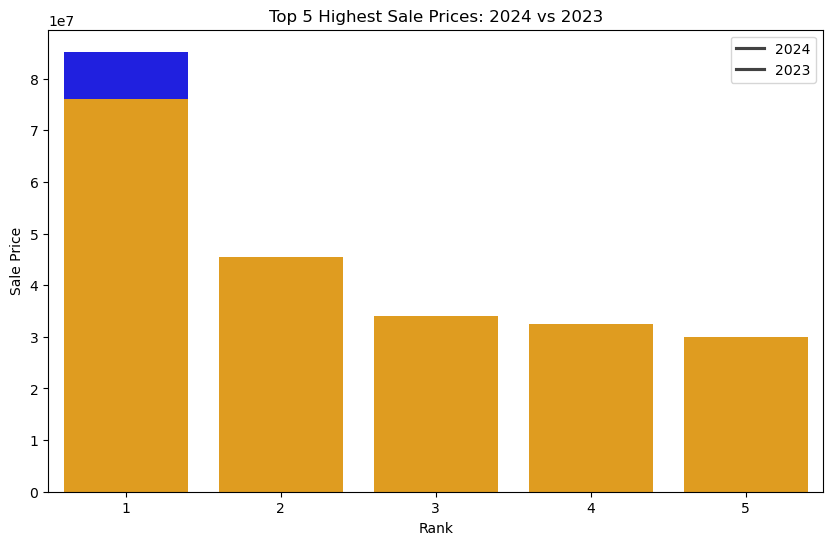

In [500]:
plt.figure(figsize=(10,6))
sns.barplot(x='Rank', y='2024', data=compare_df, color='blue', label='2024')
sns.barplot(x='Rank', y='2023', data=compare_df, color='orange', label='2023')

plt.title("Top 5 Highest Sale Prices: 2024 vs 2023")
plt.xlabel("Rank")
plt.ylabel("Sale Price")
plt.legend(['2024', '2023'])
plt.show()

In [504]:
import numpy as np

In [506]:
x = np.arange(1, 6)  
width = 0.35  

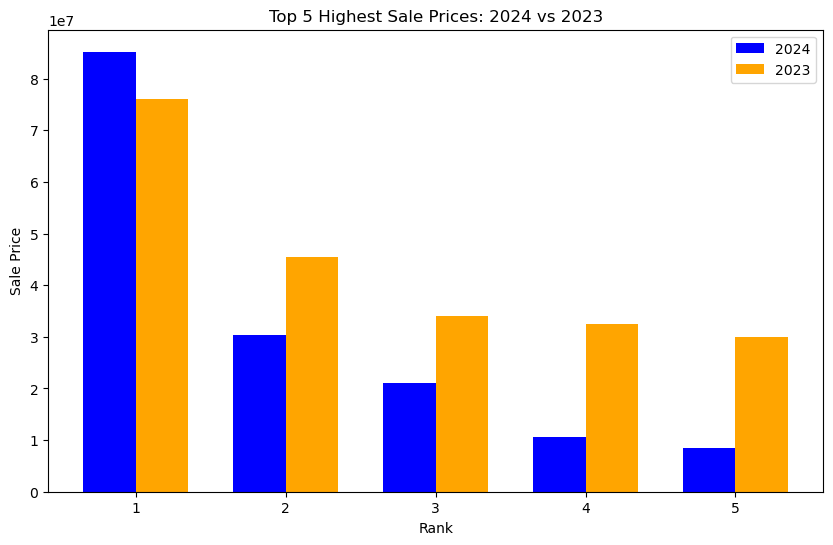

In [508]:
plt.figure(figsize=(10,6))
plt.bar(x - width/2, top5_2024, width=width, color='blue', label='2024')
plt.bar(x + width/2, top5_2023, width=width, color='orange', label='2023')

plt.title("Top 5 Highest Sale Prices: 2024 vs 2023")
plt.xlabel("Rank")
plt.ylabel("Sale Price")
plt.xticks(x, [str(i) for i in x])  # show ranks 1-5
plt.legend()
plt.show()